+-----------------------+--------------------+
|        Metric         |       Value        |
+-----------------------+--------------------+
|       Accuracy        | 0.8148148148148148 |
|     ROC AUC Score     |        0.8         |
| Cross-Validation Mean | 0.811965811965812  |
+-----------------------+--------------------+


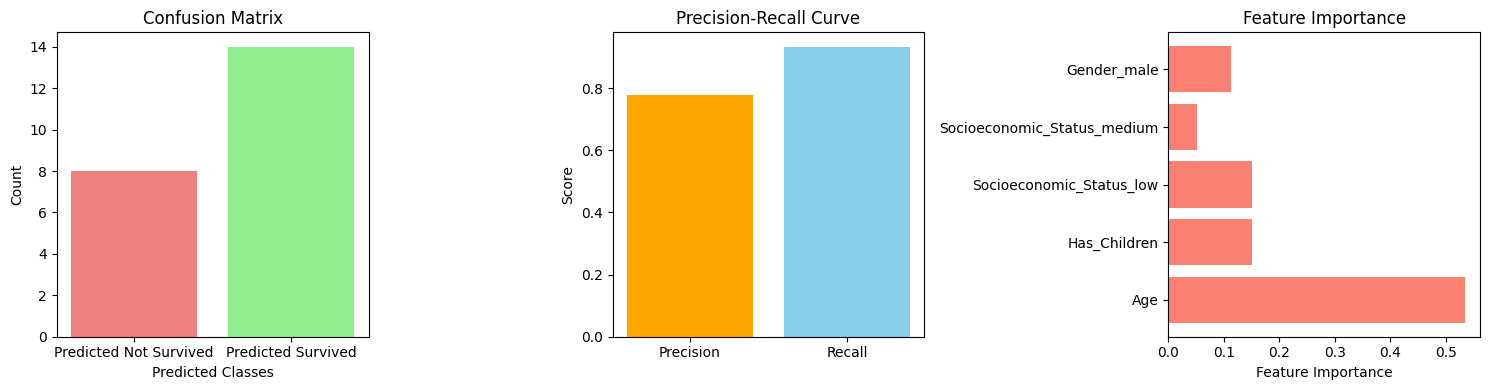

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tabulate import tabulate

#Loading dataset to be read
data = pd.read_csv('sinking_factors_data.csv')

#Preprocessing the data
data = pd.get_dummies(data, columns=['Socioeconomic_Status', 'Gender'], drop_first=True)
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

#Initializing and training hyperparameters
model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               random_state=42)
model.fit(X_train, y_train)

#Predicting test set
y_pred = model.predict(X_test)

#Evaluating the given model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

#Cross-validating for model performance and accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

#Summary table
summary_data = {
    'Metric': ['Accuracy', 'ROC AUC Score', 'Cross-Validation Mean'],
    'Value': [accuracy, roc_auc, np.mean(cv_scores)]
}
summary_table = pd.DataFrame(summary_data)

#Displaying summary table
print(tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False))

#Visualization of results
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.bar(['Predicted Not Survived', 'Predicted Survived'], [conf_matrix[0, 0], conf_matrix[1, 1]], color=['lightcoral', 'lightgreen'])
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Confusion Matrix')
plt.subplot(1, 3, 2)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
plt.bar(['Precision', 'Recall'], [precision, recall], color=['orange', 'skyblue'])
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.subplot(1, 3, 3)
feature_importance = model.feature_importances_
features = X.columns
plt.barh(features, feature_importance, color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()